The aim of the notebook is to help you to take confidence with the undirected graph class of NEMtropy. We will guide you through the functionality of the module and they can be use to reconstruct a network given partial information or to generate a null model given a certain network.
For more detail about the theory behind this, we suggest you to read .....

In [1]:
import numpy as np
import networkx as nx
from NEMtropy import UndirectedGraph, matrix_generator
from NEMtropy.network_functions import build_graph_from_edgelist

According to the type of undirected graph, the available models can be divided in:
 - models for binary network: "cm" and "cm_exp"
 - models for weighted networks: "crema", "ecm" and "ecm_exp"

We will make some examples about both classes of models, lets start from binary models.

# 1) Binary Models

In [2]:
# Lets load the zachary karate club from networkx
g = nx.karate_club_graph()

# then we convert it to numpy adjacency matrix, edgelist and degree sequence
adj_kar = nx.to_numpy_array(g)
edg_kar = nx.to_pandas_edgelist(g).values
dseq_kar = np.sum(adj_kar, axis=1)

UndirectedGraph instance can be initialised using adjacency matrix, edgelist or degree and strength sequences. As an example we initialise a graph instance using the adjacency matrix.

In [3]:
graph = UndirectedGraph(adj_kar)

When you use an initiliasition instance that isn't the adjacency matrix you must specify what you are passing to UndirectedGraph. As an exaple we can use the edgelist.

In [4]:
graph = UndirectedGraph(edgelist=edg_kar)

## 1.1) Null Models

Now that our graph instance is initialised lets see what we can do with it. The first example that we consider is how to generate 10 (or more) random versions of zachary karate club having (on average) the same degree sequence of the orginal one. These can be used to compare same properties of the original zachary karate club with their expected value under a random null model preserving the degree sequence.

In [5]:
# Solve tool function solves, for the underlying graph instance, the selected "model" using "method" and "initial_guess" as starting point of the optimization.
# When the undirected network you are considering is binary the available model are 

graph.solve_tool(model="cm_exp",
                 method="newton",
                 initial_guess="random")

# For networks that are not too large (>5000 nodes, but depends on the amount of ram of your laptop) we suggest to use "newton" method.
# You can che if the optimization process was successful by printing the error attribute. 
# Pay attention: error attribute is None if you didn't solve any model yet.

print("The largest error on the degree sequence is ", graph.error)

# As you can notice the error is quite small: the optimisation proccess worked properly!

The largest error on the degree sequence is  2.354429300410743e-07


In [6]:
# When your netwoork is too large, newton can be too costly in terms of memory and the suggested method is "fixed-point".
graph.solve_tool(model="cm_exp",
                 method="fixed-point",
                 initial_guess="random")

print("The largest error on the degree sequence is ", graph.error)

# As you can notice the error is again quite small. For large networks can be better to look at the relative error on the degree sequence instead of the absolute one.


The largest error on the degree sequence is  6.578878242180508e-08


In [7]:
# After that we have solved the model we can use it to generate random versions of zachary karate club.
# The ensemble sampler function generates "n" random versions of zachary karate club using the model parameters computed by solve_tool.

graph.ensemble_sampler(10, cpu_n=2, output_dir="sample/")

# In the folder "sample/" there are 10 random copies of zachary karate club saved as edgelist.

In [8]:
# We read one of the edgelists
edgelist_ens = np.loadtxt("sample/0.txt")

# and build the adjacency matrix
ens_adj = build_graph_from_edgelist(edgelist = edgelist_ens,
                                    is_directed = False,
                                    is_sparse = False,
                                    is_weighted = False)

## 1.2) Graph Reconstruction

Suppose now that you have only partial information about the zachary karate club network: only the degree sequence is disclosed. Following the same procedure described above, we can generate generate a network having (on average) the same observed degree sequence.

In [9]:
# We initialise the graph instance
graph = UndirectedGraph(degree_sequence=dseq_kar)

# We solve the binary model
graph.solve_tool(model="cm_exp",
                 method="newton",
                 initial_guess="random")

# We generate an ensemble copy
graph.ensemble_sampler(1, cpu_n=2, output_dir="sample/")

# We read the edgelist
edgelist_ens = np.loadtxt("sample/0.txt")

# And generate a networkx graph from it
G = nx.Graph()
G.add_edges_from(edgelist_ens)

# then we can build the adjacency matrix
ens_adj = build_graph_from_edgelist(edgelist = edgelist_ens,
                                    is_directed = False,
                                    is_sparse = False,
                                    is_weighted = False)

# or generate a networkx graph from it
G = nx.DiGraph()
G.add_edges_from(edgelist_ens.astype(int))

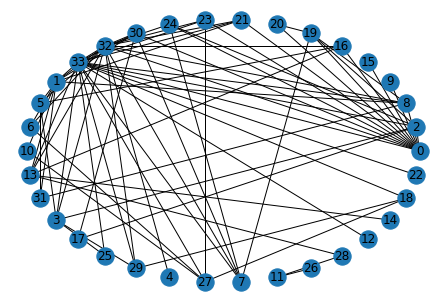

In [10]:
# We can draw the reconstructed network using
nx.draw_circular(G, arrows=False, with_labels=True)

# 2) Weigthed Models

## 2.1) Null Models

In [11]:
# First of all we generate the adjacency matrix of a weighted undirected graph using the matrix_generator module of NEMtropy
adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=30,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

# Then we intialise the graph instance
graph = UndirectedGraph(adj_weigh)

# We can the see the graph sequence of the graph by tapping
print("Graph strength sequence ",graph.strength_sequence)

Graph strength sequence  [106.  26.  89. 112.  50.  69. 102.  62. 187.  69. 154.  66.  55. 101.
 128.  99.  61.  70.  75.  43.  60. 122. 170. 136.  74.  87.  54.  87.
  76.  36.]


In [12]:
# Similarly to the binary case, we can solve the weighted model by solve_tool
graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton")

# The optimisation problem is divided in two steps: firstly the binary model is solved and its solution are one
# of the inputs for the weighted model solver. You can choose the method used for the binary and weighted part separately.
# You can even pass an adjacency matrix as imput for the binary part and we will go through this in the next subsection.

In [13]:
# Lets check if the optimisation was successful by printing the errors on the degree and strength sequences
print(graph.error_degree, graph.error_strength)

2.4148240296284484e-08 3.0472051548713353e-09


In [14]:
# Similarly to the binary case, we can generate 10 ensembles copies using ensemble_sampler
graph.ensemble_sampler(10, cpu_n=2, output_dir="sample/")

# We read the edgelist
edgelist_ens = np.loadtxt("sample/0.txt")

# and build the adjacency matrix
ens_adj = build_graph_from_edgelist(edgelist = edgelist_ens,
                                    is_directed = False,
                                    is_sparse = False,
                                    is_weighted = True)

## 2.2) Reconstruction

Suppose you have only partial information about the network, for example:
 - The binary structure is well-known and you want to assign weights to network edges;
 - Only marginals information are available: degree and strength sequences.

You can use NEMtropy methods to reconstruct a network configuration that is consistent with the available informations.

### 2.2.1) Adjacency matrix 

In [15]:
# For this example we generate the adjacency matrix of a weighted undirected graph using the matrix_generator module of NEMtropy
adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=100,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

# Lets store the binary structure and strength sequence
adj_bin = adj_weigh.astype(bool).astype(float)
strength_seq = adj_weigh.sum(axis=1)

# Now we suppose that the weighted structure is not available
del adj_weigh

# We can initialiase our graph instance with the strength sequence
graph_weighted = UndirectedGraph(strength_sequence=strength_seq)

In [16]:
# Then we solve the model using the adjacency binary matrix as an input for the solver
graph_weighted.solve_tool(model="crema",
                          method="newton",
                          initial_guess="random",
                          adjacency=adj_bin)


In [17]:
# Lets check if the optimisation was successful by printing the error on strength sequence
print(graph_weighted.error_strength)

1.4779288903810084e-12


In [29]:
# In conclsion we generate a network having the binary structure of "adj_bin" and 
# and weights satisfying (on average) the given "strength_seq"
graph.ensemble_sampler(1, cpu_n=2, output_dir="sample/")

# We read the edgelist
edgelist_ens = np.loadtxt("sample/0.txt")

# then we can build the adjacency matrix
ens_adj = build_graph_from_edgelist(edgelist = edgelist_ens,
                                    is_directed = False,
                                    is_sparse = False,
                                    is_weighted = True)

# and generate a networkx graph from it
G = nx.from_numpy_array(ens_adj)

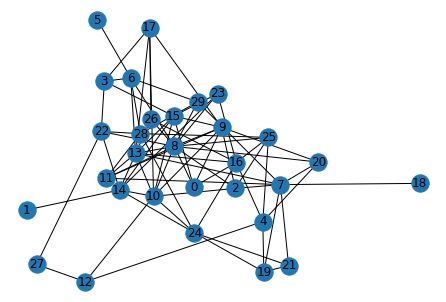

In [30]:
# We can draw the reconstructed network using
nx.draw(G, arrows=True, with_labels=True)

### 2.2.2) Only the marginals are available

In [20]:
# As an example we generate the adjacency matrix of a weighted undirected graph using the matrix_generator module of NEMtropy
adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=100,
                                                                                     p=0.4,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

# Lets store the binary structure and strength sequence
degree_seq = adj_weigh.astype(bool).astype(float).sum(axis=1)
strength_seq = adj_weigh.sum(axis=1)

# Now we suppose that the weighted structure is not available
del adj_weigh

# We can initialiase our graph instance with degree and strength sequence
graph_weighted = UndirectedGraph(degree_sequence=degree_seq, strength_sequence=strength_seq)

In [21]:
# We solve the model, we pass a model as adjacency and the solver will use degree sequence
# to infer the binary structure
graph_weighted.solve_tool(model="crema",
                          method="newton",
                          initial_guess="random",
                          adjacency="cm_exp",
                          method_adjacency="newton")

In [22]:
# Lets check if the optimisation was successful by printing the errors on strength and degree sequences
print(graph_weighted.error_degree, graph_weighted.error_strength)

1.3476636695486377e-08 7.958078640513122e-13


In [31]:
# Now we generate a network having a binary structure inferred from dseq
# and weights satisfying (on average) the given "strength_seq"
graph.ensemble_sampler(1, cpu_n=2, output_dir="sample/")

# We read the edgelist
edgelist_ens = np.loadtxt("sample/0.txt")

# then we can build the adjacency matrix
ens_adj = build_graph_from_edgelist(edgelist = edgelist_ens,
                                    is_directed = False,
                                    is_sparse = False,
                                    is_weighted = True)

# and generate a networkx graph from it
G = nx.from_numpy_array(ens_adj)

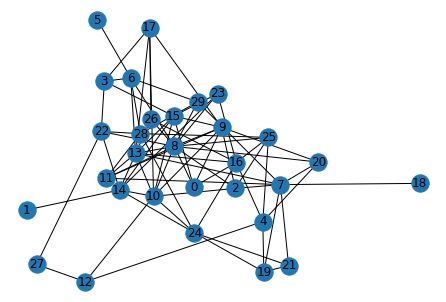

In [32]:
# We can draw the reconstructed network using
nx.draw(G, arrows=True, with_labels=True)